# RElu6

In [15]:
import matplotlib.pyplot as plt
import numpy as np

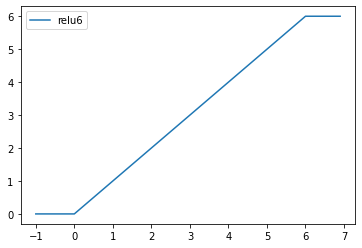

In [41]:
def relu(x):
    return max(0,x)

def c (x):
    #return relu(x)-relu(x-6)
    return min(max(0,x),6)

x = np.arange(-1,7,0.1)
y1 = [relu(i) for i in x]
y2 = [c(i) for i in x]
#plt.plot(x, y1, label='relu')
plt.plot(x, y2, label='relu6')
plt.legend()
pass

# MNv2

In [3]:
n_class=1000
input_size=224
width_mult=1.
dropout_ratio=0.2
use_batch_norm=True

In [24]:
input_channel = 32
last_channel = 1280
interverted_residual_setting = [
    # t, c, n, s
    [1, 16, 1, 1],
    [6, 24, 2, 2],
    [6, 32, 3, 2],
    [6, 64, 4, 2],
    [6, 96, 3, 1],
    [6, 160, 3, 2],
    [6, 320, 1, 1],
]

assert input_size % 32 == 0
input_channel = int(input_channel * width_mult)
last_channel = int(last_channel * width_mult) if width_mult > 1.0 else last_channel

input_channel, last_channel

(32, 1280)

In [25]:
def conv_bn(inp, oup, stride, use_batch_norm=True):
    return None

class InvertedResidual:
    def __init__(self, inp, oup, stride, expand_ratio, use_batch_norm=True, onnx_compatible=False):
        print(inp, oup, stride, expand_ratio, use_batch_norm)
        pass

block = InvertedResidual

In [26]:
features = [conv_bn(3, input_channel, 2)]

In [27]:
for t, c, n, s in interverted_residual_setting:
            output_channel = int(c * width_mult)
            for i in range(n):
                if i == 0:
                    features.append(block(input_channel, output_channel, s,
                                               expand_ratio=t, use_batch_norm=use_batch_norm))
                else:
                    features.append(block(input_channel, output_channel, 1,
                                               expand_ratio=t, use_batch_norm=use_batch_norm))
                input_channel = output_channel

32 16 1 1 True
16 24 2 6 True
24 24 1 6 True
24 32 2 6 True
32 32 1 6 True
32 32 1 6 True
32 64 2 6 True
64 64 1 6 True
64 64 1 6 True
64 64 1 6 True
64 96 1 6 True
96 96 1 6 True
96 96 1 6 True
96 160 2 6 True
160 160 1 6 True
160 160 1 6 True
160 320 1 6 True


In [11]:
# keras layers
import numpy as np

In [6]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K

### Test framework

In [94]:
def get_model(layer):
    input = Input(shape=(10))
    d = layer

    x = d(input)
    model = Model(inputs=input, outputs = x)
    model.compile("sgd","mse")
    return model

In [99]:
def check(keras_layer, copy_fn, eps = 1e-4, verbose = False):
    # create model with layer & copied behaviour
    model = get_model(keras_layer)
    copy_layer = copy_fn(keras_layer)
    
    # get results
    test_data = np.random.rand(1,10)
    gt_output = model.predict(test_data)
    copied_output = copy_layer.forward(test_data)
    
    result = True
    
    # compare shapes
    if gt_output.shape != copied_output.shape:
        print(f"Shape: ERROR: (GT){gt_output.shape} vs (COPY){copied_output.shape}")
        result = False
    else:
        print("Shape: OK")
    
    # compare values
    valid_cells = np.sum(np.abs(gt_output-copied_output)<eps)
    all_cells = 1
    for i in range(len(gt_output.shape)):
        all_cells *= gt_output.shape[i]
    
    if (all_cells==valid_cells):
        print(f"Values (eps={eps}): OK")
    else:
        print(f"Values (eps={eps}): ERROR, only {valid_cells}/{all_cells} are valid")
        result = False
        if verbose:
            print("(GT)", gt_output)
            print("(COPY)", copied_output)
    
    return result 

### Layers

In [100]:
class DenseLayer:
    def __init__(self, keras_dense_layer):
        self.d = keras_dense_layer
        self.weights = K.get_value(d.weights[0])
        self.bias = K.get_value(d.weights[1])
        
    def forward(self, x):
        return x.dot(self.weights) + self.bias
    
d = Dense(2)
check(d, lambda x: DenseLayer(x), verbose=True)

Shape: OK
Values (eps=0.0001): OK


True

In [ ]:
TODO : add max, mean reconstruction error